<a href="https://colab.research.google.com/github/Andrade-Douglas/Data-Science/blob/master/pPrefeitura_de_Votorantim_Folha_de_Pagamento_2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Projeto: Folha de Pagamento Prefeitura - JULHO/2019

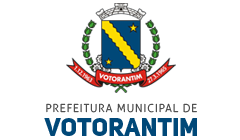

Fonte: https://www.votorantim.sp.gov.br/portal/transparencia

Fonte de Dados: Folha de Pagamento [clique aqui](https://www.votorantim.sp.gov.br/portal/transparencia/121/2019/)

Fonte de Dados: Relação de Servidores [clique aqui](http://s2.asp.srv.br/etransparencia.pm.votorantim.sp/servlet/wwpessoalservidor?UgJCMerreSqYHGfvUwT03ib6oCQhMT1UmUMZbHKrpsr82chJJMDHUYlgk9itEATW)

Montando Drive

In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


Importando Bibliotecas

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
%matplotlib inline

Carregando a primeira Base de Dados com informações pessoais dos colaboradores

DataFrame Pessoal Servidor

In [3]:
pessoal_servidor = pd.read_excel('/gdrive/My Drive/Colab Notebooks/Prefeitura de Votorantim 2019/PessoalServidor-072019.xls', 
                                skiprows = 11,
                                usecols=['Matrícula', 'Tipo de Vínculo', 'Lotação', 'Local de Trabalho', 'Folha','Adiantamento']
                              )
pessoal_servidor.head(n = 3)

,Matrícula,Tipo de Vínculo,Lotação,Local de Trabalho,Folha,Adiantamento
0,13646.0,ESTATUTÁRIO,SECRETARIA DE SERVICOS PUBLICOS,SERVICOS PUBLICOS,FOLHA NORMAL,0
1,10229.0,ESTATUTÁRIO,UBS ITAPEVA,PAÇO,FOLHA NORMAL,0
2,13647.0,ESTATUTÁRIO,EMEIEF GILBERTO DOS SANTOS,EMEIEF GILBERTO DOS SANTOS,FOLHA NORMAL,0


O DataFrame possui dados duplicados na coluna Matrícula?

In [4]:
dados = any(pessoal_servidor['Matrícula'].duplicated())

if dados == True:
  print('O DataFrame possui dados duplicados na coluna Matrícula')
else:
  print('O DataFrame NÃO possui dados duplicados na coluna Matrícula')

O DataFrame possui dados duplicados na coluna Matrícula


Quais são essas colunas?

In [5]:
pessoal_servidor[pessoal_servidor.Matrícula.duplicated()].count()

Matrícula            8
Tipo de Vínculo      8
Lotação              8
Local de Trabalho    8
Folha                8
Adiantamento         9
dtype: int64

In [6]:
pessoal_servidor[pessoal_servidor.Matrícula.duplicated()]

,Matrícula,Tipo de Vínculo,Lotação,Local de Trabalho,Folha,Adiantamento
382,12427.0,ESTATUTÁRIO,SECRETARIA DE NEGOCIOS JURIDICOS,PAÇO,HONORÁRIOS,0
981,13701.0,ESTATUTÁRIO,SECRETARIA DE NEGOCIOS JURIDICOS,PAÇO,HONORÁRIOS,0
985,11191.0,ESTATUTÁRIO,SECRETARIA DE NEGOCIOS JURIDICOS,PAÇO,HONORÁRIOS,0
1029,13822.0,ESTATUTÁRIO,SECRETARIA DE NEGOCIOS JURIDICOS,PAÇO,FOLHA NORMAL,0
1155,10275.0,ESTATUTÁRIO,SECRETARIA DE NEGOCIOS JURIDICOS,PAÇO,FOLHA NORMAL,0
1232,12216.0,ESTATUTÁRIO,SECRETARIA DE NEGOCIOS JURIDICOS,PAÇO,HONORÁRIOS,0
1246,11010.0,ESTATUTÁRIO,SECRETARIA DE NEGOCIOS JURIDICOS,PAÇO,FOLHA NORMAL,0
1340,12813.0,ESTATUTÁRIO,SECRETARIA DE NEGOCIOS JURIDICOS,PAÇO,FOLHA NORMAL,0
2596,NaN,NaN,NaN,NaN,NaN,NaN
2597,NaN,NaN,NaN,NaN,NaN,NaN


Como este DataFrame possui duplicidade na coluna Matrículas. Logo, precisamos removê-las.

Removendo as duplicidades e mantendo apenas os primeiros registros

In [7]:
pessoal_servidor = pessoal_servidor.drop_duplicates(subset=['Matrícula'], keep='first')

In [8]:
pessoal_servidor[pessoal_servidor.Matrícula.duplicated()].count()

Matrícula            0
Tipo de Vínculo      0
Lotação              0
Local de Trabalho    0
Folha                0
Adiantamento         0
dtype: int64

Limpeza de valores NaN

In [9]:
pessoal_servidor.isnull().sum()

Matrícula            1
Tipo de Vínculo      1
Lotação              3
Local de Trabalho    1
Folha                1
Adiantamento         1
dtype: int64

Temos valores NaN em nosso DataFrame

As linhas que possuem NaN em seus registros

In [10]:
pessoal_servidor[pessoal_servidor.isna().any(axis=1)]         

,Matrícula,Tipo de Vínculo,Lotação,Local de Trabalho,Folha,Adiantamento
71,12.0,AGENTE POLÍTICO,NaN,PAÇO,FOLHA NORMAL,0
843,11.0,AGENTE POLÍTICO,NaN,PAÇO,FOLHA NORMAL,0
2595,NaN,NaN,NaN,NaN,NaN,NaN


Obtendo apenas as linhas preenchidas na coluna Matrícula

In [11]:
pessoal_servidor = pessoal_servidor[pessoal_servidor['Matrícula'].notna()]

Como podem ver as linhas da coluna Lotação não foram preenchidas

In [12]:
pessoal_servidor.isnull().sum()

Matrícula            0
Tipo de Vínculo      0
Lotação              2
Local de Trabalho    0
Folha                0
Adiantamento         0
dtype: int64

Preenchendo a linha vazia do campo Lotação

In [13]:
pessoal_servidor = pessoal_servidor.replace(np.nan, 'AGENTE POLÍTICO', regex=True)

In [14]:
pessoal_servidor[pessoal_servidor['Lotação'] == 'AGENTE POLÍTICO']

,Matrícula,Tipo de Vínculo,Lotação,Local de Trabalho,Folha,Adiantamento
71,12.0,AGENTE POLÍTICO,AGENTE POLÍTICO,PAÇO,FOLHA NORMAL,0
843,11.0,AGENTE POLÍTICO,AGENTE POLÍTICO,PAÇO,FOLHA NORMAL,0


DataFrame tratado

In [15]:
pessoal_servidor.isnull().sum()

Matrícula            0
Tipo de Vínculo      0
Lotação              0
Local de Trabalho    0
Folha                0
Adiantamento         0
dtype: int64

Retorne uma série contendo contagens de valores exclusivos.

In [16]:
# Para podermos excluir a coluna 'Adiantamento' precisamos certificar se possui valores != 0
for dados_adiantamento in pessoal_servidor['Adiantamento']:
  if (dados_adiantamento == 0):
    print('Na coluna Adiantamento não existem valores diferentes de 0. \nPode excluir.')
    break
  else:
    print('Na coluna Adiantamento existem valores diferentes de 0. \nNão pode excluir.')
    break

Na coluna Adiantamento não existem valores diferentes de 0. 
Pode excluir.


In [17]:
# Para podermos excluir a coluna 'Folha' precisamos certificar se possui valores != 0
for dados_folha in pessoal_servidor['Folha']:
  if (dados_folha == 'FOLHA NORMAL'):
    print('Na coluna Folha não existem strings diferentes de FOLHA NORMAL. \nPode excluir.')
    break
  else:
    print('Na coluna Folha existem strings diferentes de FOLHA NORMAL. \nNão pode excluir.')
    break

Na coluna Folha não existem strings diferentes de FOLHA NORMAL. 
Pode excluir.


Após verificação podemos excluir as colunas desnecessárias.

In [18]:
pessoal_servidor = pessoal_servidor.drop(['Folha', 'Adiantamento'], axis = 1)
pessoal_servidor.head(n = 3)

,Matrícula,Tipo de Vínculo,Lotação,Local de Trabalho
0,13646.0,ESTATUTÁRIO,SECRETARIA DE SERVICOS PUBLICOS,SERVICOS PUBLICOS
1,10229.0,ESTATUTÁRIO,UBS ITAPEVA,PAÇO
2,13647.0,ESTATUTÁRIO,EMEIEF GILBERTO DOS SANTOS,EMEIEF GILBERTO DOS SANTOS


Vamos dar uma nova observada em nosso Data Frame.

In [19]:
pessoal_servidor.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2587 entries, 0 to 2594
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Matrícula          2587 non-null   float64
 1   Tipo de Vínculo    2587 non-null   object 
 2   Lotação            2587 non-null   object 
 3   Local de Trabalho  2587 non-null   object 
dtypes: float64(1), object(3)
memory usage: 101.1+ KB


Agora! Vamos analisar nosso segundo Data Frame.

Data Frame Folha de Pagamento

In [20]:
folha_de_pagamento = pd.read_excel('/gdrive/My Drive/Colab Notebooks/Prefeitura de Votorantim 2019/VencimentoServidor-072019.xls', 
                      usecols = ['Matrícula', 'Cargo', 'Situação', 'Vecto Mês', 'Líquido'],
                      skipfooter = 1
                      )
folha_de_pagamento.head(n = 3)

,Matrícula,Cargo,Situação,Vecto Mês,Líquido
0,40764,818 - ESTAGIO EDUCACAO FISICA,ATIVO,1026.04,1026.04
1,40771,818 - ESTAGIO EDUCACAO FISICA,ATIVO,1026.04,1026.04
2,40772,800 - ESTAGIARIO DIREITO,ATIVO,1026.04,1026.04


In [21]:
folha_de_pagamento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2478 entries, 0 to 2477
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Matrícula  2478 non-null   int64  
 1   Cargo      2444 non-null   object 
 2   Situação   2478 non-null   object 
 3   Vecto Mês  2478 non-null   float64
 4   Líquido    2478 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 96.9+ KB


Duplicadas

In [22]:
dados = any(folha_de_pagamento['Matrícula'].duplicated())

if dados == True:
  print('O DataFrame possui dados duplicados na coluna Matrícula')
else:
  print('O DataFrame NÃO possui dados duplicados na coluna Matrícula')

O DataFrame NÃO possui dados duplicados na coluna Matrícula


Valores vazios

In [23]:
dados_folha = any(folha_de_pagamento.isnull())

if dados_folha == True:
  print('O DataFrame possui valores Nan na coluna Folha de Pagamento')
else:
  print('O DataFrame NÃO possui valores Nan na coluna Folha de Pagamento')

O DataFrame possui valores Nan na coluna Folha de Pagamento


In [24]:
folha_de_pagamento.isnull().sum()

Matrícula     0
Cargo        34
Situação      0
Vecto Mês     0
Líquido       0
dtype: int64

Trazendo apenas as linhas com NaN dentro do Data Frame

In [25]:
folha_de_pagamento[folha_de_pagamento.isna().any(axis = 1)]

,Matrícula,Cargo,Situação,Vecto Mês,Líquido
844,13197,NaN,ATIVO,4015.75,3027.76
845,13200,NaN,ATIVO,2085.68,1140.88
846,13201,NaN,ATIVO,1925.25,1400.21
847,13206,NaN,ATIVO,2294.25,1519.25
848,13208,NaN,ATIVO,2941.60,2760.67
849,13210,NaN,ATIVO,2051.11,1587.95
850,13211,NaN,ATIVO,2373.36,1905.99
851,13214,NaN,ATIVO,2768.15,2538.71
852,13215,NaN,ATIVO,3084.78,2417.22
853,13218,NaN,ATIVO,1907.42,1676.72


Substituir NaN por NÃO PREENCHIDO

In [26]:
folha_de_pagamento = folha_de_pagamento.replace(np.nan, 'NÃO PREENCHIDO', regex=True)

In [27]:
folha_de_pagamento[folha_de_pagamento['Cargo'] == 'NÃO PREENCHIDO'][:5]

,Matrícula,Cargo,Situação,Vecto Mês,Líquido
844,13197,NÃO PREENCHIDO,ATIVO,4015.75,3027.76
845,13200,NÃO PREENCHIDO,ATIVO,2085.68,1140.88
846,13201,NÃO PREENCHIDO,ATIVO,1925.25,1400.21
847,13206,NÃO PREENCHIDO,ATIVO,2294.25,1519.25
848,13208,NÃO PREENCHIDO,ATIVO,2941.60,2760.67


Agora vamos analisar os valores.

In [28]:
print('A coluna Vecto Mês possui a somatória de: R$ {:>10,.2f}'.format(round(folha_de_pagamento['Vecto Mês'].sum(),2)))

A coluna Vecto Mês possui a somatória de: R$ 9,370,885.74


In [29]:
print('A coluna Líquido possui a somatória de: R$ {:>10,.2f}'.format(round(folha_de_pagamento['Líquido'].sum(),2)))

A coluna Líquido possui a somatória de: R$ 6,603,183.71


Após todo esse trabalho vamos unir nossos dois DataFrames

In [30]:
df = pd.merge(pessoal_servidor, folha_de_pagamento, how = 'right', on = 'Matrícula')
df.head(n = 3)

,Matrícula,Tipo de Vínculo,Lotação,Local de Trabalho,Cargo,Situação,Vecto Mês,Líquido
0,40764.0,ESTAGIÁRIO,SECRETARIA DE ESPORTES E LAZER,PAÇO,818 - ESTAGIO EDUCACAO FISICA,ATIVO,1026.04,1026.04
1,40771.0,ESTAGIÁRIO,SECRETARIA DE ESPORTES E LAZER,SECRETARIA DE ESPORTES,818 - ESTAGIO EDUCACAO FISICA,ATIVO,1026.04,1026.04
2,40772.0,ESTAGIÁRIO,SECRETARIA DE NEGOCIOS JURIDICOS,PAÇO,800 - ESTAGIARIO DIREITO,ATIVO,1026.04,1026.04


Após a união vamos confirmar os números

In [31]:
print('A coluna Vecto Mês possui a somatória de: R$ {:>10,.2f}'.format(round(df['Vecto Mês'].sum(),2)))

A coluna Vecto Mês possui a somatória de: R$ 9,370,885.74


In [32]:
print('A coluna Líquido possui a somatória de: R$ {:>10,.2f}'.format(round(df['Líquido'].sum(),2)))

A coluna Líquido possui a somatória de: R$ 6,603,183.71


Informações a respeito do Data Frame

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2478 entries, 0 to 2477
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Matrícula          2478 non-null   float64
 1   Tipo de Vínculo    2462 non-null   object 
 2   Lotação            2462 non-null   object 
 3   Local de Trabalho  2462 non-null   object 
 4   Cargo              2478 non-null   object 
 5   Situação           2478 non-null   object 
 6   Vecto Mês          2478 non-null   float64
 7   Líquido            2478 non-null   float64
dtypes: float64(3), object(5)
memory usage: 174.2+ KB


Padronizando a compreensão dos nomes das colunas. Sem acentuação, nem caixa alta ou espaços

In [34]:
df.columns = df.columns.str.lower().str.replace(' ', '_').str.replace('í', 'i').str.replace('ã', 'a').str.replace('/', '_').str.replace('ç', 'c').str.replace('ê', 'e')
df.head()

,matricula,tipo_de_vinculo,lotacao,local_de_trabalho,cargo,situacao,vecto_mes,liquido
0,40764.0,ESTAGIÁRIO,SECRETARIA DE ESPORTES E LAZER,PAÇO,818 - ESTAGIO EDUCACAO FISICA,ATIVO,1026.04,1026.04
1,40771.0,ESTAGIÁRIO,SECRETARIA DE ESPORTES E LAZER,SECRETARIA DE ESPORTES,818 - ESTAGIO EDUCACAO FISICA,ATIVO,1026.04,1026.04
2,40772.0,ESTAGIÁRIO,SECRETARIA DE NEGOCIOS JURIDICOS,PAÇO,800 - ESTAGIARIO DIREITO,ATIVO,1026.04,1026.04
3,40775.0,ESTAGIÁRIO,SECRETARIA DE EDUCACAO,SECRETARIA DE EDUCACAO,807 - ESTAGIO PEDAGOGIA,ATIVO,1026.04,1026.04
4,40777.0,ESTAGIÁRIO,CIDADANIA E GERACAO DE RENDA,CIDADANIA,824 - ESTAGIO PSICOLOGIA,ATIVO,1026.04,1026.04


Apenas confirmando a ausência de dados duplicados.

In [35]:
dados = any(df['matricula'].duplicated())

if dados == True:
  print('O DataFrame possui dados duplicados na coluna Matrícula')
else:
  print('O DataFrame NÃO possui dados duplicados na coluna Matrícula')

O DataFrame NÃO possui dados duplicados na coluna Matrícula


Informações gerais a respeito dos dados do nosso DataFrame

In [36]:
print('Existem valores nulos dentro do DataFrame? ', df.isnull().values.any())

Existem valores nulos dentro do DataFrame?  True


Quantos?

In [37]:
df.isnull().sum()

matricula             0
tipo_de_vinculo      16
lotacao              16
local_de_trabalho    16
cargo                 0
situacao              0
vecto_mes             0
liquido               0
dtype: int64

Quais registros?

In [38]:
df[df.isna().any(axis = 1)]

,matricula,tipo_de_vinculo,lotacao,local_de_trabalho,cargo,situacao,vecto_mes,liquido
2455,10418.0,NaN,NaN,NaN,75 - ASSISTENTE SOCIAL,DESLIGADO,123663.17,121960.33
2457,10495.0,NaN,NaN,NaN,5 - CIRURGIAO DENTISTA,DESLIGADO,66085.28,65183.69
2460,12197.0,NaN,NaN,NaN,925 - PEB I JORNADA BASICA,DESLIGADO,13904.76,9236.90
2461,12692.0,NaN,NaN,NaN,390 - INSPETOR DE ALUNOS,DESLIGADO,3925.99,3843.29
2462,12704.0,NaN,NaN,NaN,260 - AUXILIAR DE ENFERMAGEM,DESLIGADO,8907.73,8765.49
2463,12854.0,NaN,NaN,NaN,925 - PEB I JORNADA BASICA,DESLIGADO,12902.47,9932.13
2466,13668.0,NaN,NaN,NaN,270 - OPERADOR MAQ CARREG ROLO COMPACT E,DESLIGADO,17682.26,17506.51
2467,13891.0,NaN,NaN,NaN,126 - AUXILIAR DE LIMPEZA PUBLICA,DESLIGADO,7140.00,7032.90
2468,14534.0,NaN,NaN,NaN,36 - MEDICO PEDIATRA PLANTONISTA,DESLIGADO,14269.56,13992.84
2471,75412.0,NaN,NaN,NaN,939 - PEB I CONTRATO,DESLIGADO,5843.65,5740.75


Após uma análise percebemos que podemos preencher com NÃO PREENCHIDO

In [39]:
df = df.replace(np.nan, 'NÃO PREENCHIDO', regex=True)

In [40]:
df[df['tipo_de_vinculo'] == 'NÃO PREENCHIDO'][:5]

,matricula,tipo_de_vinculo,lotacao,local_de_trabalho,cargo,situacao,vecto_mes,liquido
2455,10418.0,NÃO PREENCHIDO,NÃO PREENCHIDO,NÃO PREENCHIDO,75 - ASSISTENTE SOCIAL,DESLIGADO,123663.17,121960.33
2457,10495.0,NÃO PREENCHIDO,NÃO PREENCHIDO,NÃO PREENCHIDO,5 - CIRURGIAO DENTISTA,DESLIGADO,66085.28,65183.69
2460,12197.0,NÃO PREENCHIDO,NÃO PREENCHIDO,NÃO PREENCHIDO,925 - PEB I JORNADA BASICA,DESLIGADO,13904.76,9236.90
2461,12692.0,NÃO PREENCHIDO,NÃO PREENCHIDO,NÃO PREENCHIDO,390 - INSPETOR DE ALUNOS,DESLIGADO,3925.99,3843.29
2462,12704.0,NÃO PREENCHIDO,NÃO PREENCHIDO,NÃO PREENCHIDO,260 - AUXILIAR DE ENFERMAGEM,DESLIGADO,8907.73,8765.49


In [41]:
df.isnull().sum()

matricula            0
tipo_de_vinculo      0
lotacao              0
local_de_trabalho    0
cargo                0
situacao             0
vecto_mes            0
liquido              0
dtype: int64

In [42]:
df.head()

,matricula,tipo_de_vinculo,lotacao,local_de_trabalho,cargo,situacao,vecto_mes,liquido
0,40764.0,ESTAGIÁRIO,SECRETARIA DE ESPORTES E LAZER,PAÇO,818 - ESTAGIO EDUCACAO FISICA,ATIVO,1026.04,1026.04
1,40771.0,ESTAGIÁRIO,SECRETARIA DE ESPORTES E LAZER,SECRETARIA DE ESPORTES,818 - ESTAGIO EDUCACAO FISICA,ATIVO,1026.04,1026.04
2,40772.0,ESTAGIÁRIO,SECRETARIA DE NEGOCIOS JURIDICOS,PAÇO,800 - ESTAGIARIO DIREITO,ATIVO,1026.04,1026.04
3,40775.0,ESTAGIÁRIO,SECRETARIA DE EDUCACAO,SECRETARIA DE EDUCACAO,807 - ESTAGIO PEDAGOGIA,ATIVO,1026.04,1026.04
4,40777.0,ESTAGIÁRIO,CIDADANIA E GERACAO DE RENDA,CIDADANIA,824 - ESTAGIO PSICOLOGIA,ATIVO,1026.04,1026.04


### Pronto! Temos nosso DataFrame final para análise. Começaremos com um pouco de estatística:

In [43]:
df['matricula'] = df['matricula'].astype(object)
df.dtypes

matricula             object
tipo_de_vinculo       object
lotacao               object
local_de_trabalho     object
cargo                 object
situacao              object
vecto_mes            float64
liquido              float64
dtype: object

Estatística

In [ ]:
#pip uninstall pandas-profiling

Uninstalling pandas-profiling-2.9.0:
  Would remove:
    /usr/local/bin/pandas_profiling
    /usr/local/lib/python3.6/dist-packages/pandas_profiling-2.9.0.dist-info/*
    /usr/local/lib/python3.6/dist-packages/pandas_profiling/*
Proceed (y/n)? n


In [ ]:
#pip install pandas-profiling

In [ ]:
from pandas_profiling import ProfileReport

In [ ]:
profile = ProfileReport(df, title='Prefeitura de Votorantim - Folha de Pagamento 2019',html={'style':{'full_width':True}})

In [ ]:
profile.to_notebook_iframe()

In [ ]:
profile.to_file(output_file="dataframe_report.html")

NameError: ignored

In [44]:
print('1- Quantidade de servidores públicos registrados no DataFrame: {0:,}'.format(df['matricula'].count()))
print('2- Soma do vencimento dos servidores públicos registrados no DataFrame: R$ {:>10,.2f}'.format(round(df['vecto_mes'].sum(),2)))
print('3- Soma do liquido dos servidores públicos registrados no DataFrame: R$ {:>10,.2f}'.format(round(df['liquido'].sum(),2)))

1- Quantidade de servidores públicos registrados no DataFrame: 2,478
2- Soma do vencimento dos servidores públicos registrados no DataFrame: R$ 9,370,885.74
3- Soma do liquidoos dos servidores públicos registrados no DataFrame: R$ 6,603,183.71


In [45]:
print('Valores estatísticos referentes a folha de pagamento: \n')
round(df.describe(include=['float64']), 2)

Valores estatísticos referentes a folha de pagamento: 



,vecto_mes,liquido
count,2478.00,2478.00
mean,3781.63,2664.72
std,4085.74,3445.05
min,59.53,0.00
25%,1888.84,1217.08
50%,2782.35,2040.28
75%,4505.74,3210.60
max,123663.17,121960.33


In [46]:
_mean = pd.Series({'Estatistica': 'Média', 'Resultado': round(df['liquido'].mean(),3)})
_median = pd.Series({'Estatistica': 'Mediana', 'Resultado': round(df['liquido'].median(),3)})
_quantile = pd.Series({'Estatistica': 'Quartile', 'Resultado': round(df['liquido'].quantile(),3)})
_mode = pd.Series({'Estatistica': 'Moda', 'Resultado': df['liquido'].mode()})
_max = pd.Series({'Estatistica': 'Máximo', 'Resultado': round(df['liquido'].max(),3)})
_min = pd.Series({'Estatistica': 'Mínimo', 'Resultado': round(df['liquido'].min(),3)})
_var = pd.Series({'Estatistica': 'Variança', 'Resultado': round(df['liquido'].var(),3)})
_mad = pd.Series({'Estatistica': 'Desvio Absoluto', 'Resultado': round(df['liquido'].mad(),3)})
_std = pd.Series({'Estatistica': 'Desvio Padrão', 'Resultado': round(df['liquido'].std(),3)})

result = pd.DataFrame([_mean, _median, _quantile, _mode, _max, _min, _var, _mad, _std ])
result

,Estatistica,Resultado
0,Média,2664.72
1,Mediana,2040.29
2,Quartile,2040.29
3,Moda,0 1026.04 dtype: float64
4,Máximo,121960
5,Mínimo,0
6,Variança,1.18684e+07
7,Desvio Absoluto,1528.39
8,Desvio Padrão,3445.05


Agrupamento

In [47]:
tips = df.groupby(['tipo_de_vinculo', 'situacao']).agg({'liquido':'sum'}).sort_values(by='liquido', ascending=False)
tips

,,liquido
tipo_de_vinculo,situacao,
ESTATUTÁRIO,ATIVO,5156623.16
CARGO EM COMISSÃO,ATIVO,709709.29
NÃO PREENCHIDO,DESLIGADO,307000.91
ESTAGIÁRIO,ATIVO,196246.43
TEMPORÁRIO,ATIVO,194659.01
ESTATUTÁRIO,DESLIGADO,23297.68
AGENTE POLÍTICO,ATIVO,13595.15
ESTAGIÁRIO,DESLIGADO,2052.08


In [48]:
tips.T

tipo_de_vinculo,ESTATUTÁRIO,CARGO EM COMISSÃO,NÃO PREENCHIDO,ESTAGIÁRIO,TEMPORÁRIO,ESTATUTÁRIO,AGENTE POLÍTICO,ESTAGIÁRIO
situacao,ATIVO,ATIVO,DESLIGADO,ATIVO,ATIVO,DESLIGADO,ATIVO,DESLIGADO
liquido,5156623.16,709709.29,307000.91,196246.43,194659.01,23297.68,13595.15,2052.08


In [50]:
tips.unstack(0)

liquido                    ...                          
tipo_de_vinculo AGENTE POLÍTICO CARGO EM COMISSÃO  ... NÃO PREENCHIDO TEMPORÁRIO
situacao                                           ...                          
ATIVO                  13595.15         709709.29  ...            NaN  194659.01
DESLIGADO                   NaN               NaN  ...      307000.91        NaN

[2 rows x 6 columns]

Describe() por categoria

In [51]:
round(df.groupby('tipo_de_vinculo').liquido.describe()).sort_values(by='max', ascending=False)

,count,mean,std,min,25%,50%,75%,max
tipo_de_vinculo,,,,,,,,
NÃO PREENCHIDO,16.0,19188.0,31200.0,2869.0,5266.0,8417.0,14871.0,121960.0
ESTATUTÁRIO,1945.0,2663.0,2087.0,0.0,1386.0,2127.0,3207.0,36913.0
CARGO EM COMISSÃO,179.0,3965.0,1956.0,173.0,2654.0,3845.0,4935.0,11921.0
AGENTE POLÍTICO,2.0,6798.0,981.0,6104.0,6451.0,6798.0,7144.0,7491.0
TEMPORÁRIO,93.0,2093.0,840.0,444.0,1536.0,2193.0,2715.0,5779.0
ESTAGIÁRIO,243.0,816.0,254.0,107.0,537.0,1026.0,1026.0,1026.0


Para um entendimento da tabela acima irei dar uma pequena explicação

Percebam que a coluna std nada mais é que o Desvio Padrão da coluna 'lotacao' com a coluna 'liquido'. Quanto mais o valor da coluna std for próxima do 0, mais próximo da média é a liquidez recebida por todos os servidores da mesma lotação.

Amplitude: colunas, min e max

In [52]:
round(df.groupby('lotacao').liquido.describe()).sort_values(by='max', ascending=False)

,count,mean,std,min,25%,50%,75%,max
lotacao,,,,,,,,
NÃO PREENCHIDO,16.0,19188.0,31200.0,2869.0,5266.0,8417.0,14871.0,121960.0
EMEIEF IZABEL FERNANDES PEDROSO,22.0,3704.0,7481.0,528.0,1440.0,2402.0,3043.0,36913.0
UPA CENTRAL,111.0,5208.0,3540.0,1041.0,2129.0,3908.0,8048.0,12468.0
DEPTO TRIBUTACAO RECEITA E FISCALIZACAO,12.0,5024.0,2483.0,2016.0,3909.0,4392.0,4987.0,11921.0
SECRETARIA DE SAUDE,62.0,3223.0,2473.0,547.0,1026.0,2742.0,4367.0,11881.0
...,...,...,...,...,...,...,...,...
DEPARTAMENTO DE CULTURA,1.0,1026.0,NaN,1026.0,1026.0,1026.0,1026.0,1026.0
DEPARTAMENTO DE COMPRAS,1.0,1026.0,NaN,1026.0,1026.0,1026.0,1026.0,1026.0
ENSINO FUNDAMENTAL APOIO,1.0,652.0,NaN,652.0,652.0,652.0,652.0,652.0


In [53]:
round(df.groupby('local_de_trabalho').liquido.describe()).sort_values(by='max', ascending=False)

,count,mean,std,min,25%,50%,75%,max
local_de_trabalho,,,,,,,,
NÃO PREENCHIDO,16.0,19188.0,31200.0,2869.0,5266.0,8417.0,14871.0,121960.0
EMEIEF IZABEL FERNANDES PEDROSO,20.0,3970.0,7818.0,528.0,1719.0,2559.0,3019.0,36913.0
PAÇO,776.0,3410.0,2599.0,71.0,1471.0,2551.0,4679.0,12468.0
UBS RIO ACIMA,7.0,3959.0,3986.0,1010.0,1725.0,2133.0,4340.0,12436.0
EMEIEF PROFª PARIZETE J BRESSANE,12.0,2725.0,2677.0,537.0,730.0,1874.0,3705.0,9825.0
...,...,...,...,...,...,...,...,...
LICITACAO,1.0,1026.0,NaN,1026.0,1026.0,1026.0,1026.0,1026.0
CIRETRAN,2.0,1026.0,0.0,1026.0,1026.0,1026.0,1026.0,1026.0
CONSELHO TUTELAR,2.0,1026.0,0.0,1026.0,1026.0,1026.0,1026.0,1026.0


In [54]:
round(df.groupby('cargo').liquido.describe()).sort_values(by='max', ascending=False)

,count,mean,std,min,25%,50%,75%,max
cargo,,,,,,,,
75 - ASSISTENTE SOCIAL,19.0,9452.0,27281.0,718.0,2956.0,3386.0,3583.0,121960.0
5 - CIRURGIAO DENTISTA,43.0,6613.0,9364.0,761.0,3726.0,6063.0,6781.0,65184.0
921 - DIRETOR DE ESCOLA ED,28.0,6172.0,6144.0,3212.0,4141.0,4768.0,5925.0,36913.0
530 - DIRETOR DE DEPTO CONTENCIOSO GERAL,1.0,19062.0,NaN,19062.0,19062.0,19062.0,19062.0,19062.0
270 - OPERADOR MAQ CARREG ROLO COMPACT E,3.0,7778.0,8425.0,2912.0,2913.0,2914.0,10210.0,17507.0
...,...,...,...,...,...,...,...,...
340 - MARCENEIRO,3.0,736.0,413.0,260.0,601.0,942.0,974.0,1006.0
310 - CALCETEIRO,1.0,968.0,NaN,968.0,968.0,968.0,968.0,968.0
455 - COVEIRO,2.0,882.0,60.0,839.0,861.0,882.0,903.0,924.0


In [55]:
round(df.groupby('situacao').liquido.describe()).sort_values(by='max', ascending=False)

,count,mean,std,min,25%,50%,75%,max
situacao,,,,,,,,
DESLIGADO,24.0,13848.0,26384.0,1009.0,3390.0,6329.0,9411.0,121960.0
ATIVO,2454.0,2555.0,2055.0,0.0,1212.0,2029.0,3164.0,36913.0


In [56]:
round(df.groupby(['tipo_de_vinculo', 'situacao']).agg({'liquido': np.sum, 'tipo_de_vinculo': np.size}), 2).sort_values(by='liquido', ascending=False)

,,liquido,tipo_de_vinculo
tipo_de_vinculo,situacao,,
ESTATUTÁRIO,ATIVO,5156623.16,1939
CARGO EM COMISSÃO,ATIVO,709709.29,179
NÃO PREENCHIDO,DESLIGADO,307000.91,16
ESTAGIÁRIO,ATIVO,196246.43,241
TEMPORÁRIO,ATIVO,194659.01,93
ESTATUTÁRIO,DESLIGADO,23297.68,6
AGENTE POLÍTICO,ATIVO,13595.15,2
ESTAGIÁRIO,DESLIGADO,2052.08,2


Percebam que podemos identificar imediatamento os liquidos máximos recebebidos por cada tipo de vínculo e sua situação. Percebam líquido de 36.000 até 121.000.

In [57]:
round(df.groupby(['tipo_de_vinculo', 'situacao']).agg({'liquido': np.max, 'tipo_de_vinculo': np.size}), 2).sort_values(by='liquido', ascending=False)

liquido  tipo_de_vinculo
tipo_de_vinculo   situacao                             
NÃO PREENCHIDO    DESLIGADO  121960.33               16
ESTATUTÁRIO       ATIVO       36912.53             1939
CARGO EM COMISSÃO ATIVO       11921.48              179
ESTATUTÁRIO       DESLIGADO    8286.68                6
AGENTE POLÍTICO   ATIVO        7491.12                2
TEMPORÁRIO        ATIVO        5778.73               93
ESTAGIÁRIO        ATIVO        1026.04              241
                  DESLIGADO    1026.04                2

#### Vamos fazer uma busca em nossa Base de Dados mediante as informações da tabela acima.

#### Quem recebeu o valor máximo:

In [58]:
print('Índice liquidez máxima: {0:,}'.format(round(df['liquido'].idxmax(),2)))
print('Valor recebido R$ {:>10,.2f}'.format(round(df['liquido'].max(),2)))

Índice liquidez máxima: 2,455
Valor recebido R$ 121,960.33


Quem?

In [59]:
df.loc[[2462]]

,matricula,tipo_de_vinculo,lotacao,local_de_trabalho,cargo,situacao,vecto_mes,liquido
2462,12704,NÃO PREENCHIDO,NÃO PREENCHIDO,NÃO PREENCHIDO,260 - AUXILIAR DE ENFERMAGEM,DESLIGADO,8907.73,8765.49


Quem recebeu o valor mínimo:

In [60]:
print('Índice liquidez mínimo: {0:,}'.format(round(df['liquido'].idxmin(),2)))
print('Valor recebido R$ {:>10,.2f}'.format(round(df['liquido'].min(),2)))

Índice liquidez mínimo: 2,326
Valor recebido R$       0.00


In [61]:
df.loc[[785]]

,matricula,tipo_de_vinculo,lotacao,local_de_trabalho,cargo,situacao,vecto_mes,liquido
785,13006,ESTATUTÁRIO,CMEI ROSA PEREIRA,CMEI ROSA PEREIRA,919 - COORDENADOR PEDAGOGICO,ATIVO,6501.57,3539.92


Filtro apenas para os comissionados

In [62]:
df.query('liquido > 10000 & liquido < liquido.max() & tipo_de_vinculo == "CARGO EM COMISSÃO"').sort_values(by='liquido', ascending=False)

,matricula,tipo_de_vinculo,lotacao,local_de_trabalho,cargo,situacao,vecto_mes,liquido
613,12349,CARGO EM COMISSÃO,DEPTO TRIBUTACAO RECEITA E FISCALIZACAO,PAÇO,87 - JULGADOR TRIBUTARIO SECR. FINANCAS,ATIVO,17978.07,11921.48
270,10306,CARGO EM COMISSÃO,SECRETARIA DE SAUDE,PAÇO,544 - DIRETOR DE DEPARTAMENTO MEDICO - SESA,ATIVO,17047.12,11867.02
245,10048,CARGO EM COMISSÃO,CONTROLE DE ZOONOSES,PAÇO,949 - CHEFE DE SERV DE CONTROLE DE ZOONOSES -,ATIVO,17376.95,11533.61
570,12140,CARGO EM COMISSÃO,UPA CENTRAL,PAÇO,1021 - DIRETOR DE DEPTO MED DE URGENCIA E,ATIVO,16134.60,11278.21


Uma visão geral

In [63]:
df.groupby(['tipo_de_vinculo','local_de_trabalho', 'cargo', 'lotacao'], sort = True).sum()

vecto_mes  liquido
tipo_de_vinculo   local_de_trabalho             cargo                                            lotacao                                                            
AGENTE POLÍTICO   PAÇO                          904 - PREFEITO                                   AGENTE POLÍTICO                                   17978.07  7491.12
                                                905 - VICE PREFEITO                              AGENTE POLÍTICO                                    8572.89  6104.03
CARGO EM COMISSÃO AGERV                         93 - GERENTE DE UNIDADE BASICA DE SAUDE          CAPS IJ (INFANTO JUVENIL - ANTIGO SAUDE MENTAL)    6809.60  4500.58
                  ALMOXARIFADO DA SAUDE         93 - GERENTE DE UNIDADE BASICA DE SAUDE          FARMACIA ALTO CUSTO                                6915.87  5382.38
                  AMBULANCIA                    1038 - CHEFE DE SECAO DE GESTAO DE FROTAS - SESA AMBULANCIA                                         4268.58  3287.62
...                                                                                                                                                     ...      ...
TEMPORÁRIO        UBS PQ BELA VISTA             260 - AUXILIAR DE ENFERMAGEM                     UBS PARQUE BELA VISTA                              2319.55  2126.80
                  UBS VILA GARCIA               260 - AUXILIAR DE ENFERMAGEM                     UBS VILA GARCIA                                    2119.55  1811.94
                  UNIDADE DE PRONTO ATENDIMENTO 985 - AUX. DE ENFERMAGEM PLANTONISTA             UPA CENTRAL                                        2876.14  2561.79
                  ZOONOSES                      19 - AGENTE DE CONTROLE DE ENDEMIAS              CONTROLE DE ZOONOSES                              10781.28  9527.16
                                                65 - MEDICO VETERINARIO                          CONTROLE DE ZOONOSES                               5931.46  4701.98

[1161 rows x 2 columns]

Somatório dos campos vencimento mês e liquidez, por agrupamento situação e tipo de vínculo

In [64]:
round(df.groupby(['situacao', 'tipo_de_vinculo'])[['vecto_mes', 'liquido']].sum().sort_values(by = 'liquido', ascending = False), 2)

vecto_mes     liquido
situacao  tipo_de_vinculo                          
ATIVO     ESTATUTÁRIO        7564079.73  5156623.16
          CARGO EM COMISSÃO  1008015.86   709709.29
DESLIGADO NÃO PREENCHIDO      321253.41   307000.91
ATIVO     ESTAGIÁRIO          196331.93   196246.43
          TEMPORÁRIO          222070.44   194659.01
DESLIGADO ESTATUTÁRIO          30531.33    23297.68
ATIVO     AGENTE POLÍTICO      26550.96    13595.15
DESLIGADO ESTAGIÁRIO            2052.08     2052.08

Vamos criar uma nova coluna no DataFrame, nesta coluna iremos categorizar a liquidez entre Big(Grande), Medium(Médio) e Small(Pequeno)

In [65]:
def categoriza(liquido):
    if liquido >= 10000:
        return 'Muito Grande'
    elif liquido >= 6000:
      return 'Grande'
    elif liquido >= 3000:
        return 'Medio'
    elif liquido >= 960:
        return 'Pequeno'
df['nivel_liquido'] = df['liquido'].map(categoriza)
df[:5]

,matricula,tipo_de_vinculo,lotacao,local_de_trabalho,cargo,situacao,vecto_mes,liquido,nivel_liquido
0,40764,ESTAGIÁRIO,SECRETARIA DE ESPORTES E LAZER,PAÇO,818 - ESTAGIO EDUCACAO FISICA,ATIVO,1026.04,1026.04,Pequeno
1,40771,ESTAGIÁRIO,SECRETARIA DE ESPORTES E LAZER,SECRETARIA DE ESPORTES,818 - ESTAGIO EDUCACAO FISICA,ATIVO,1026.04,1026.04,Pequeno
2,40772,ESTAGIÁRIO,SECRETARIA DE NEGOCIOS JURIDICOS,PAÇO,800 - ESTAGIARIO DIREITO,ATIVO,1026.04,1026.04,Pequeno
3,40775,ESTAGIÁRIO,SECRETARIA DE EDUCACAO,SECRETARIA DE EDUCACAO,807 - ESTAGIO PEDAGOGIA,ATIVO,1026.04,1026.04,Pequeno
4,40777,ESTAGIÁRIO,CIDADANIA E GERACAO DE RENDA,CIDADANIA,824 - ESTAGIO PSICOLOGIA,ATIVO,1026.04,1026.04,Pequeno


Somatória dos registros da coluna nivel_liquido

In [66]:
pd.value_counts(df['nivel_liquido'])

Pequeno         1496
Medio            524
Grande           128
Muito Grande      34
Name: nivel_liquido, dtype: int64

'Muito Grande', '>= 10000' e 'cargo em comissão'

In [67]:
df[(df.nivel_liquido == 'Muito Grande')].sort_values(by='liquido', ascending=False)

,matricula,tipo_de_vinculo,lotacao,local_de_trabalho,cargo,situacao,vecto_mes,liquido,nivel_liquido
2455,10418,NÃO PREENCHIDO,NÃO PREENCHIDO,NÃO PREENCHIDO,75 - ASSISTENTE SOCIAL,DESLIGADO,123663.17,121960.33,Muito Grande
2457,10495,NÃO PREENCHIDO,NÃO PREENCHIDO,NÃO PREENCHIDO,5 - CIRURGIAO DENTISTA,DESLIGADO,66085.28,65183.69,Muito Grande
572,12149,ESTATUTÁRIO,EMEIEF IZABEL FERNANDES PEDROSO,EMEIEF IZABEL FERNANDES PEDROSO,921 - DIRETOR DE ESCOLA ED,ATIVO,40132.96,36912.53,Muito Grande
2476,81209,NÃO PREENCHIDO,NÃO PREENCHIDO,NÃO PREENCHIDO,530 - DIRETOR DE DEPTO CONTENCIOSO GERAL,DESLIGADO,19782.59,19061.82,Muito Grande
2466,13668,NÃO PREENCHIDO,NÃO PREENCHIDO,NÃO PREENCHIDO,270 - OPERADOR MAQ CARREG ROLO COMPACT E,DESLIGADO,17682.26,17506.51,Muito Grande
2468,14534,NÃO PREENCHIDO,NÃO PREENCHIDO,NÃO PREENCHIDO,36 - MEDICO PEDIATRA PLANTONISTA,DESLIGADO,14269.56,13992.84,Muito Grande
484,11621,ESTATUTÁRIO,UPA CENTRAL,PAÇO,995 - MEDICO PLANTONISTA,ATIVO,17978.07,12467.71,Muito Grande
958,13598,ESTATUTÁRIO,UPA CENTRAL,UBS RIO ACIMA,995 - MEDICO PLANTONISTA,ATIVO,17978.07,12436.47,Muito Grande
502,11692,ESTATUTÁRIO,UPA CENTRAL,PAÇO,995 - MEDICO PLANTONISTA,ATIVO,17787.30,12344.62,Muito Grande
1206,14158,ESTATUTÁRIO,UPA CENTRAL,PAÇO,995 - MEDICO PLANTONISTA,ATIVO,17648.52,12309.20,Muito Grande


Gráficos: Janeiro de 2019

Pontos em evidências

In [68]:
df.query('vecto_mes >= 40000').sort_values(by='liquido', ascending=False)

,matricula,tipo_de_vinculo,lotacao,local_de_trabalho,cargo,situacao,vecto_mes,liquido,nivel_liquido
2455,10418,NÃO PREENCHIDO,NÃO PREENCHIDO,NÃO PREENCHIDO,75 - ASSISTENTE SOCIAL,DESLIGADO,123663.17,121960.33,Muito Grande
2457,10495,NÃO PREENCHIDO,NÃO PREENCHIDO,NÃO PREENCHIDO,5 - CIRURGIAO DENTISTA,DESLIGADO,66085.28,65183.69,Muito Grande
572,12149,ESTATUTÁRIO,EMEIEF IZABEL FERNANDES PEDROSO,EMEIEF IZABEL FERNANDES PEDROSO,921 - DIRETOR DE ESCOLA ED,ATIVO,40132.96,36912.53,Muito Grande


Text(0, 90, '12149')

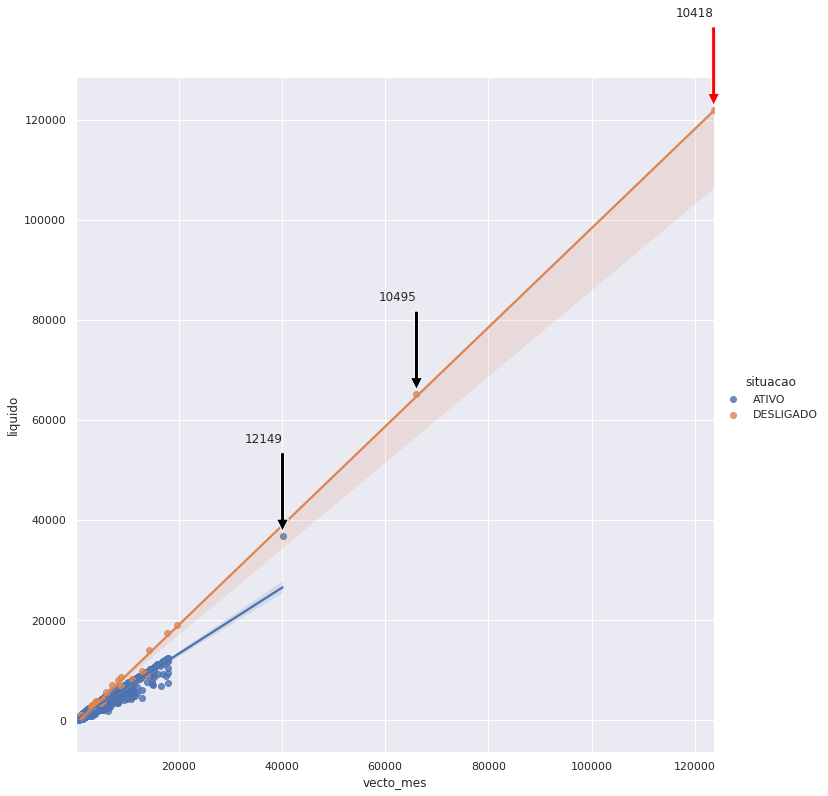

In [71]:
sns.lmplot(x='vecto_mes', y='liquido', data=df, height=10, hue='situacao', markers=['o','o'])
sns.set(rc={'figure.figsize':(10,4)})
plt.annotate(
    '10418', xy =(123663.17, 121960.33), xytext=(0, 90), textcoords='offset points', ha="right", va='bottom',
    arrowprops=dict(facecolor='red', shrink=0.05)
    )
plt.annotate(
    '10495', xy =(66085.28, 65183.69), xytext=(0, 90), textcoords='offset points', ha="right", va='bottom',
    arrowprops=dict(facecolor='black', shrink=0.05)
    )
plt.annotate(
    '12149', xy =(40132.96, 36912.53), xytext=(0, 90), textcoords='offset points', ha="right", va='bottom',
    arrowprops=dict(facecolor='black', shrink=0.05)
    )

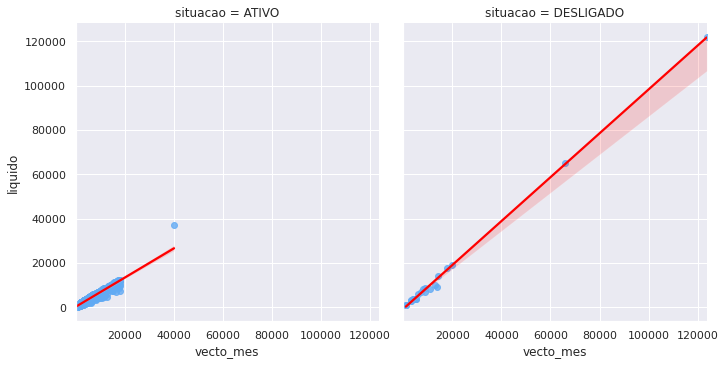

In [72]:
sns.lmplot(x='vecto_mes', y='liquido',data=df,height=5,col='situacao', hue='situacao', markers=['o','o'],
           line_kws={'color':'red'},
           scatter_kws={'color':'#61AAF4'})

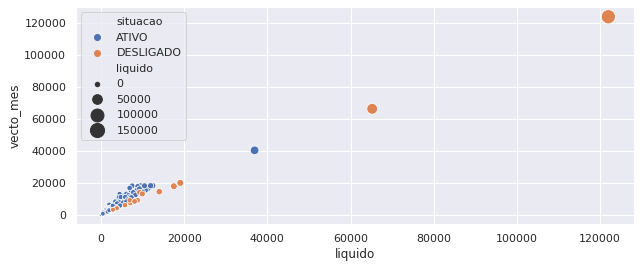

In [ ]:
sns.scatterplot(x='liquido', y='vecto_mes', data=df, hue='situacao', size='liquido', sizes=(20,200))

Com o uso do gráfico Box Plot identificamos imediatamente os que fogem totalmente do padrão. (pontos flutuantes no gráfico)

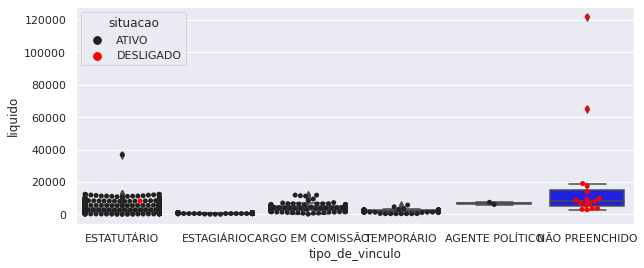

In [ ]:
sns.boxplot(x='tipo_de_vinculo',y='liquido',data=df, color='blue')
sns.swarmplot(x='tipo_de_vinculo',y='liquido',data=df, color='red', hue='situacao')

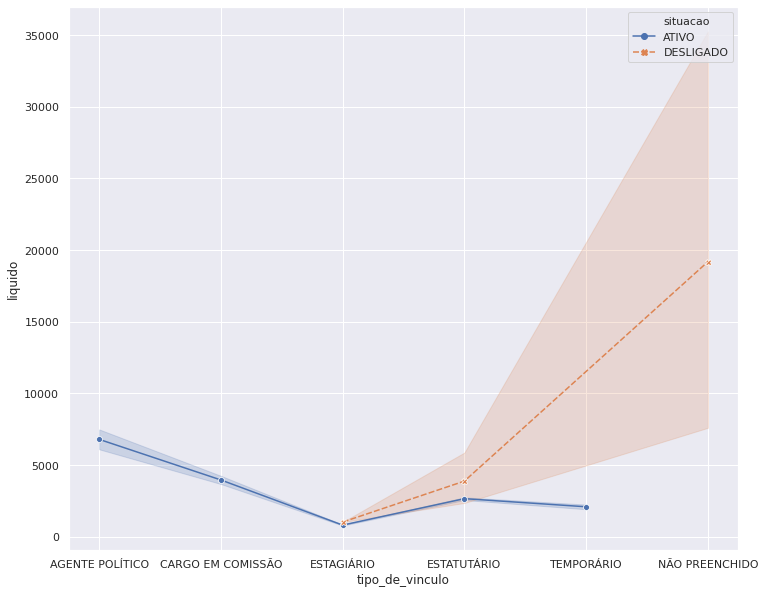

In [ ]:
sns.set(rc={'figure.figsize':(12,10)})
sns.lineplot(x = 'tipo_de_vinculo', y = 'liquido', hue = 'situacao', style = 'situacao', data = df, markers=True)

In [73]:
df.corr()

,vecto_mes,liquido
vecto_mes,1.000000,0.966723
liquido,0.966723,1.000000


In [74]:
import statsmodels.formula.api as smf
smf.ols('vecto_mes ~ liquido', data = df).fit().summary()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              vecto_mes   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                 3.536e+04
Date:                Sun, 04 Oct 2020   Prob (F-statistic):               0.00
Time:                        16:32:08   Log-Likelihood:                -20743.
No. Observations:                2478   AIC:                         4.149e+04
Df Residuals:                    2476   BIC:                         4.150e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    726.5044     26.553     27.361      0.000     674.436     778.572
liquido        1.1465      0.006    188.034      0.000       1.135       1.158
==============================================================================
Omnibus:                      792.925   Durbin-Watson:                   1.474
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           152758.780
Skew:                           0.163   Prob(JB):                         0.00
Kurtosis:                      41.463   Cond. No.                     5.51e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.51e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

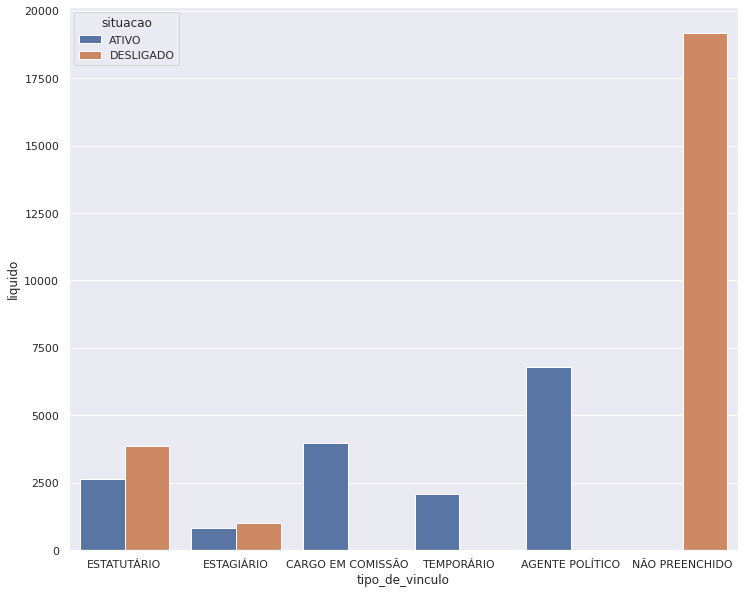

In [ ]:
sns.barplot(x = 'tipo_de_vinculo', y = 'liquido', data = df, ci = None, hue='situacao' )

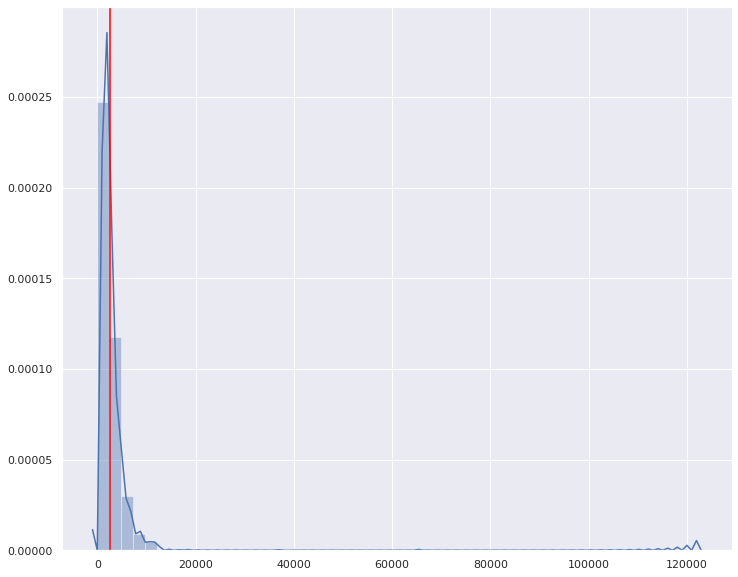

In [ ]:
x = df['liquido'].values
mean = df['liquido'].mean()
sns.distplot(x)
plt.axvline(mean,0,1,color='red')

Trazendo os maiores gastos

In [95]:
folha_cargo_em_comissao = df[df['tipo_de_vinculo'] == 'CARGO EM COMISSÃO'].sort_index().sort_values('liquido', ascending = False)
print('Número de médicos clinico geral registrados: {0} registros, R$ {1} liquido.'.format(len(folha_cargo_em_comissao), round(folha_cargo_em_comissao['liquido'].sum(),2)))

Número de médicos clinico geral registrados: 179 registros, R$ 709709.29 liquido.


In [97]:
folha_cargo_em_comissao[:10]

,matricula,tipo_de_vinculo,lotacao,local_de_trabalho,cargo,situacao,vecto_mes,liquido,nivel_liquido
613,12349,CARGO EM COMISSÃO,DEPTO TRIBUTACAO RECEITA E FISCALIZACAO,PAÇO,87 - JULGADOR TRIBUTARIO SECR. FINANCAS,ATIVO,17978.07,11921.48,Muito Grande
270,10306,CARGO EM COMISSÃO,SECRETARIA DE SAUDE,PAÇO,544 - DIRETOR DE DEPARTAMENTO MEDICO - SESA,ATIVO,17047.12,11867.02,Muito Grande
245,10048,CARGO EM COMISSÃO,CONTROLE DE ZOONOSES,PAÇO,949 - CHEFE DE SERV DE CONTROLE DE ZOONOSES -,ATIVO,17376.95,11533.61,Muito Grande
570,12140,CARGO EM COMISSÃO,UPA CENTRAL,PAÇO,1021 - DIRETOR DE DEPTO MED DE URGENCIA E,ATIVO,16134.60,11278.21,Muito Grande
495,11659,CARGO EM COMISSÃO,SAMU,AMBULANCIA,92 - GERENTE DE ENFERMAGEM DE SAMU,ATIVO,17978.07,9493.39,Grande
831,13140,CARGO EM COMISSÃO,UPA CENTRAL,PAÇO,1041 - DIRETOR DE DEPTO DE ENFERMAGEM DE,ATIVO,12743.05,8595.72,Grande
547,11827,CARGO EM COMISSÃO,SECRETARIA DE SAUDE,PAÇO,106 - DIRETOR DE LINHAS DE CUIDADOS DE SAUDE,ATIVO,9959.43,7293.68,Grande
639,12450,CARGO EM COMISSÃO,DEPTO TRIBUTACAO RECEITA E FISCALIZACAO,PAÇO,519 - DIRETOR DE DEPTO DE LANCAMENTOS E,ATIVO,9445.04,7053.90,Grande
1479,81210,CARGO EM COMISSÃO,SECRETARIA DE NEGOCIOS JURIDICOS,PAÇO,506 - SECRETARIO DE NEGOCIOS JURIDICOS,ATIVO,8572.89,6617.02,Grande
254,10129,CARGO EM COMISSÃO,ODONTO (CEO CENTRO DE ESPECIALIDADES ODONTOLOG...,PAÇO,675 - GERENTE DE AMBULATORIO DE SAUDE BUCAL,ATIVO,9213.88,6598.03,Grande


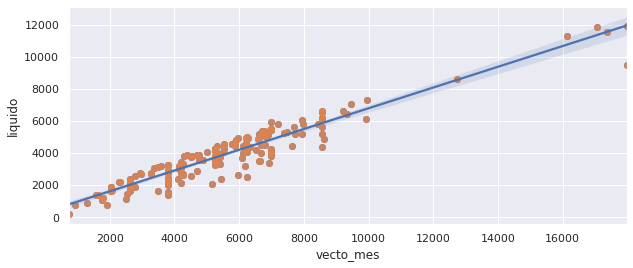

In [98]:
sns.regplot(x=folha_cargo_em_comissao["vecto_mes"], y=folha_cargo_em_comissao["liquido"])
#sns.plt.show()
 
# Without regression fit:
sns.regplot(x=folha_cargo_em_comissao["vecto_mes"], y=folha_cargo_em_comissao["liquido"], fit_reg=False)
#sns.plt.show()


Fim